<a href="https://colab.research.google.com/github/UtkarshRaj130/Advanced_Soybean_Agricultural_Dataset_Analysis/blob/main/Code_Notebooks/04_pca_kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#For dataset 3_direct_encoded.csv

In [ ]:
!wget https://raw.githubusercontent.com/UtkarshRaj130/Advanced_Soybean_Agricultural_Dataset_Analysis/refs/heads/main/Dataset/3_direct_encoded.csv -O 3_direct_encoded.csv

--2025-04-11 19:00:43--  https://raw.githubusercontent.com/UtkarshRaj130/Advanced_Soybean_Agricultural_Dataset_Analysis/refs/heads/main/Dataset/3_direct_encoded.csv?token=GHSAT0AAAAAADCATCXNXNUXBQ2W4GTRKMDEZ7ZMZEQ
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9093 (8.9K) [text/plain]
Saving to: ‘3_direct_encoded.csv’

3_direct_encoded.cs 100%[===================>]   8.88K  --.-KB/s    in 0s      

2025-04-11 19:00:43 (57.0 MB/s) - ‘3_direct_encoded.csv’ saved [9093/9093]



K=2, Silhouette Score=0.4623
K=3, Silhouette Score=0.2926
K=4, Silhouette Score=0.2617
K=5, Silhouette Score=0.2619
K=6, Silhouette Score=0.2851
K=7, Silhouette Score=0.2831
K=8, Silhouette Score=0.3175
K=9, Silhouette Score=0.2489
K=10, Silhouette Score=0.1838
K=11, Silhouette Score=0.2650
K=12, Silhouette Score=0.3314
K=13, Silhouette Score=0.3314
K=14, Silhouette Score=0.3625
K=15, Silhouette Score=0.2587
K=16, Silhouette Score=0.2477
K=17, Silhouette Score=0.2051
K=18, Silhouette Score=0.1742
K=19, Silhouette Score=0.1439


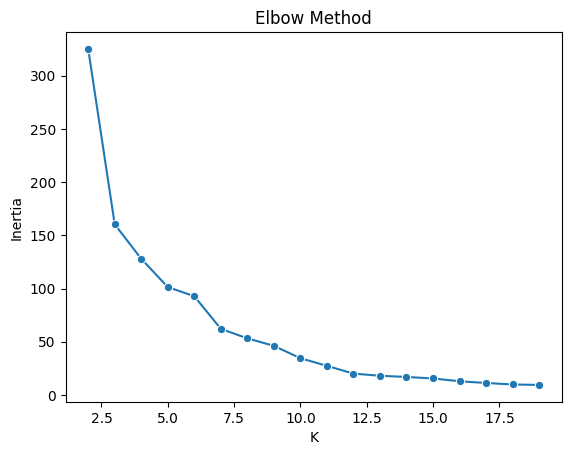

In [12]:
# 📦 KMeans Clustering on PCA(2) data
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import ParameterGrid

# Load and prepare data
full_data = pd.read_csv('3_direct_encoded.csv')
data_v2 = full_data.iloc[:, 2:]  # Exclude ID & Parameters
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data_v2), columns=data_v2.columns)

# PCA transformation
pca = PCA(n_components=2)
pca_data = pd.DataFrame(pca.fit_transform(scaled_data), columns=["PC1", "PC2"])

# Elbow & Silhouette Analysis
params = {'n_clusters': range(2, 20)}
inertia_values = []

divide = int(len(pca_data) * 0.8)
pca_data_train = pca_data[:divide]
pca_data_test = pca_data[divide:]

for param in ParameterGrid(params):
    kmeans = KMeans(n_clusters=param['n_clusters'], random_state=42)
    kmeans.fit(pca_data_train)
    preds = kmeans.predict(pca_data_test)
    score = silhouette_score(pca_data_test, preds)
    inertia_values.append(kmeans.inertia_)
    print(f"K={param['n_clusters']}, Silhouette Score={score:.4f}")

# Elbow Plot
elbow_df = pd.DataFrame({'K': list(range(2, 20)), 'Inertia': inertia_values})
sns.lineplot(data=elbow_df, x="K", y="Inertia", marker="o")
plt.title("Elbow Method")
plt.show()


🔹 Clustering and Visualization for k=5, 6, 7


Silhouette Score (K=5): 0.3851


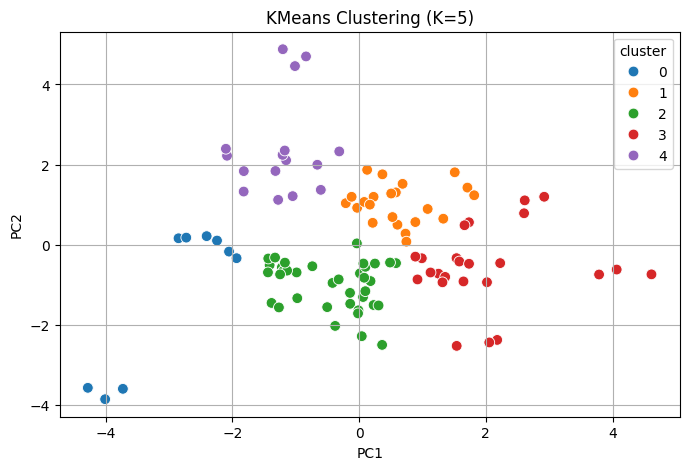


Silhouette Score (K=6): 0.4023


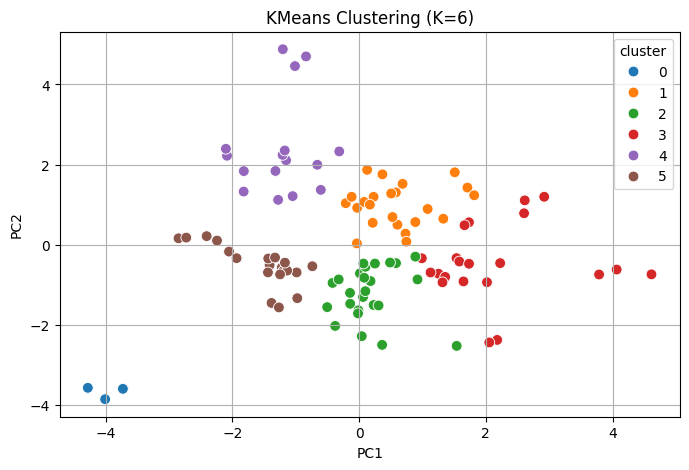


Silhouette Score (K=7): 0.3871


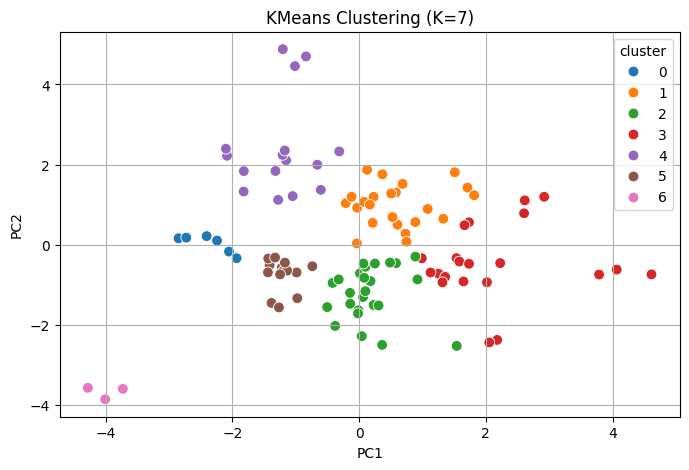

In [13]:
def run_kmeans_and_plot(pca_data, k, title):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(pca_data)
    preds = model.predict(pca_data)
    score = silhouette_score(pca_data, preds)

    pca_clustered = pca_data.copy()
    pca_clustered["cluster"] = preds

    print(f"\nSilhouette Score (K={k}): {score:.4f}")
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=pca_clustered, x='PC1', y='PC2', hue='cluster', palette='tab10', s=60)
    plt.title(title)
    plt.grid(True)
    plt.show()

    return model, pca_clustered

# Run for K = 5, 6, 7
kmeans_model_5, pca_clustered_5 = run_kmeans_and_plot(pca_data, 5, "KMeans Clustering (K=5)")
kmeans_model_6, pca_clustered_6 = run_kmeans_and_plot(pca_data, 6, "KMeans Clustering (K=6)")
kmeans_model_7, pca_clustered_7 = run_kmeans_and_plot(pca_data, 7, "KMeans Clustering (K=7)")


#For dataset 3_one_hot_encoded.csv

In [ ]:
!wget https://raw.githubusercontent.com/UtkarshRaj130/Advanced_Soybean_Agricultural_Dataset_Analysis/refs/heads/main/Dataset/3_one_hot_encoded.csv -O 3_one_hot_encoded.csv

--2025-04-11 19:00:44--  https://raw.githubusercontent.com/UtkarshRaj130/Advanced_Soybean_Agricultural_Dataset_Analysis/refs/heads/main/Dataset/3_one_hot_encoded.csv?token=GHSAT0AAAAAADCATCXMC5M3NOAUOLQBUS46Z7ZMXUQ
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-04-11 19:00:45 ERROR 404: Not Found.



K=2, Silhouette Score=0.4623
K=3, Silhouette Score=0.2926
K=4, Silhouette Score=0.2617
K=5, Silhouette Score=0.2619
K=6, Silhouette Score=0.2851
K=7, Silhouette Score=0.2831
K=8, Silhouette Score=0.3175
K=9, Silhouette Score=0.2489
K=10, Silhouette Score=0.1838
K=11, Silhouette Score=0.2650
K=12, Silhouette Score=0.3314
K=13, Silhouette Score=0.3314
K=14, Silhouette Score=0.3625
K=15, Silhouette Score=0.2587
K=16, Silhouette Score=0.2477
K=17, Silhouette Score=0.2051
K=18, Silhouette Score=0.1742
K=19, Silhouette Score=0.1439


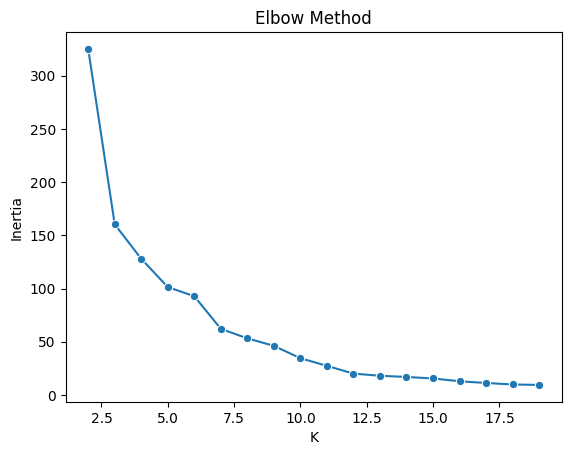

In [15]:
# 📦 KMeans Clustering on PCA(2) data
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import ParameterGrid

# Load and prepare data
full_data = pd.read_csv('3_direct_encoded.csv')
data_v2 = full_data.iloc[:, 2:]  # Exclude ID & Parameters
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data_v2), columns=data_v2.columns)

# PCA transformation
pca = PCA(n_components=2)
pca_data = pd.DataFrame(pca.fit_transform(scaled_data), columns=["PC1", "PC2"])

# Elbow & Silhouette Analysis
params = {'n_clusters': range(2, 20)}
inertia_values = []

divide = int(len(pca_data) * 0.8)
pca_data_train = pca_data[:divide]
pca_data_test = pca_data[divide:]

for param in ParameterGrid(params):
    kmeans = KMeans(n_clusters=param['n_clusters'], random_state=42)
    kmeans.fit(pca_data_train)
    preds = kmeans.predict(pca_data_test)
    score = silhouette_score(pca_data_test, preds)
    inertia_values.append(kmeans.inertia_)
    print(f"K={param['n_clusters']}, Silhouette Score={score:.4f}")

# Elbow Plot
elbow_df = pd.DataFrame({'K': list(range(2, 20)), 'Inertia': inertia_values})
sns.lineplot(data=elbow_df, x="K", y="Inertia", marker="o")
plt.title("Elbow Method")
plt.show()


🔹 Clustering and Visualization for k=5, 6, 7


Silhouette Score (K=5): 0.3851


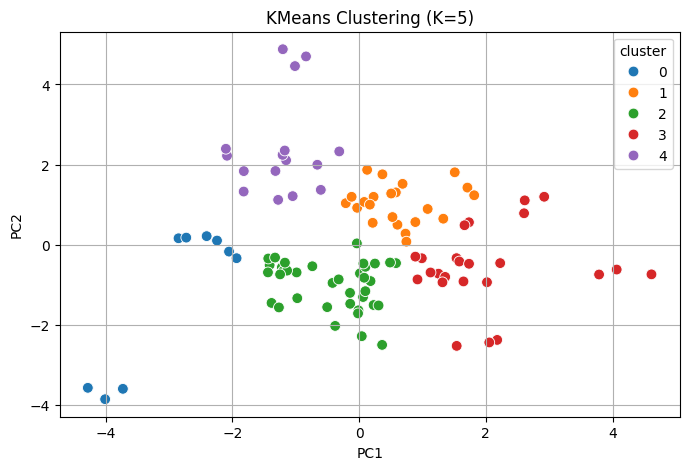


Silhouette Score (K=6): 0.4023


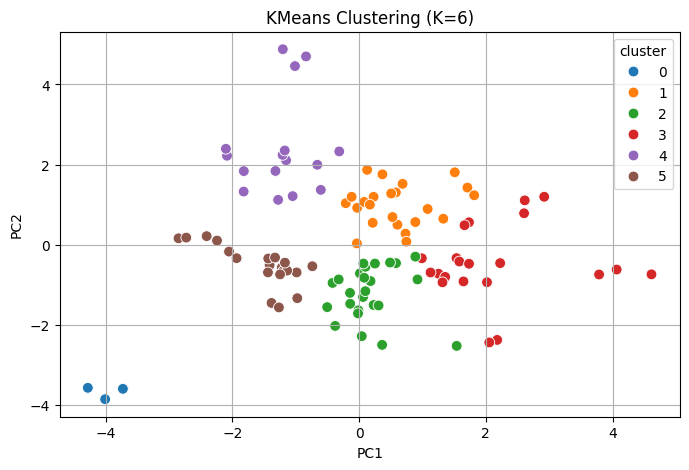


Silhouette Score (K=7): 0.3871


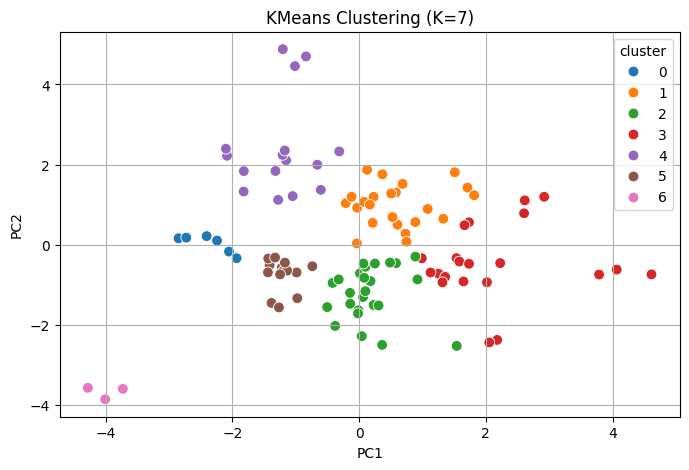

In [16]:
def run_kmeans_and_plot(pca_data, k, title):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(pca_data)
    preds = model.predict(pca_data)
    score = silhouette_score(pca_data, preds)

    pca_clustered = pca_data.copy()
    pca_clustered["cluster"] = preds

    print(f"\nSilhouette Score (K={k}): {score:.4f}")
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=pca_clustered, x='PC1', y='PC2', hue='cluster', palette='tab10', s=60)
    plt.title(title)
    plt.grid(True)
    plt.show()

    return model, pca_clustered

# Run for K = 5, 6, 7
kmeans_model_5, pca_clustered_5 = run_kmeans_and_plot(pca_data, 5, "KMeans Clustering (K=5)")
kmeans_model_6, pca_clustered_6 = run_kmeans_and_plot(pca_data, 6, "KMeans Clustering (K=6)")
kmeans_model_7, pca_clustered_7 = run_kmeans_and_plot(pca_data, 7, "KMeans Clustering (K=7)")